## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering,KMeans,DBSCAN
from scipy.cluster import hierarchy
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

## Importing Dataset

In [2]:
df = pd.read_csv(r"C:\Users\umair\OneDrive\Desktop\My Files\ExcelR\Assignments\Clustering\EastWestAirlines.csv")
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


## Data Analysis

In [3]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
df['Balance'].count()

3999

In [6]:
df.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

## Standardization

In [7]:
sc = StandardScaler()

x = sc.fit_transform(df)
x

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

## Hierarchy Clustering Model

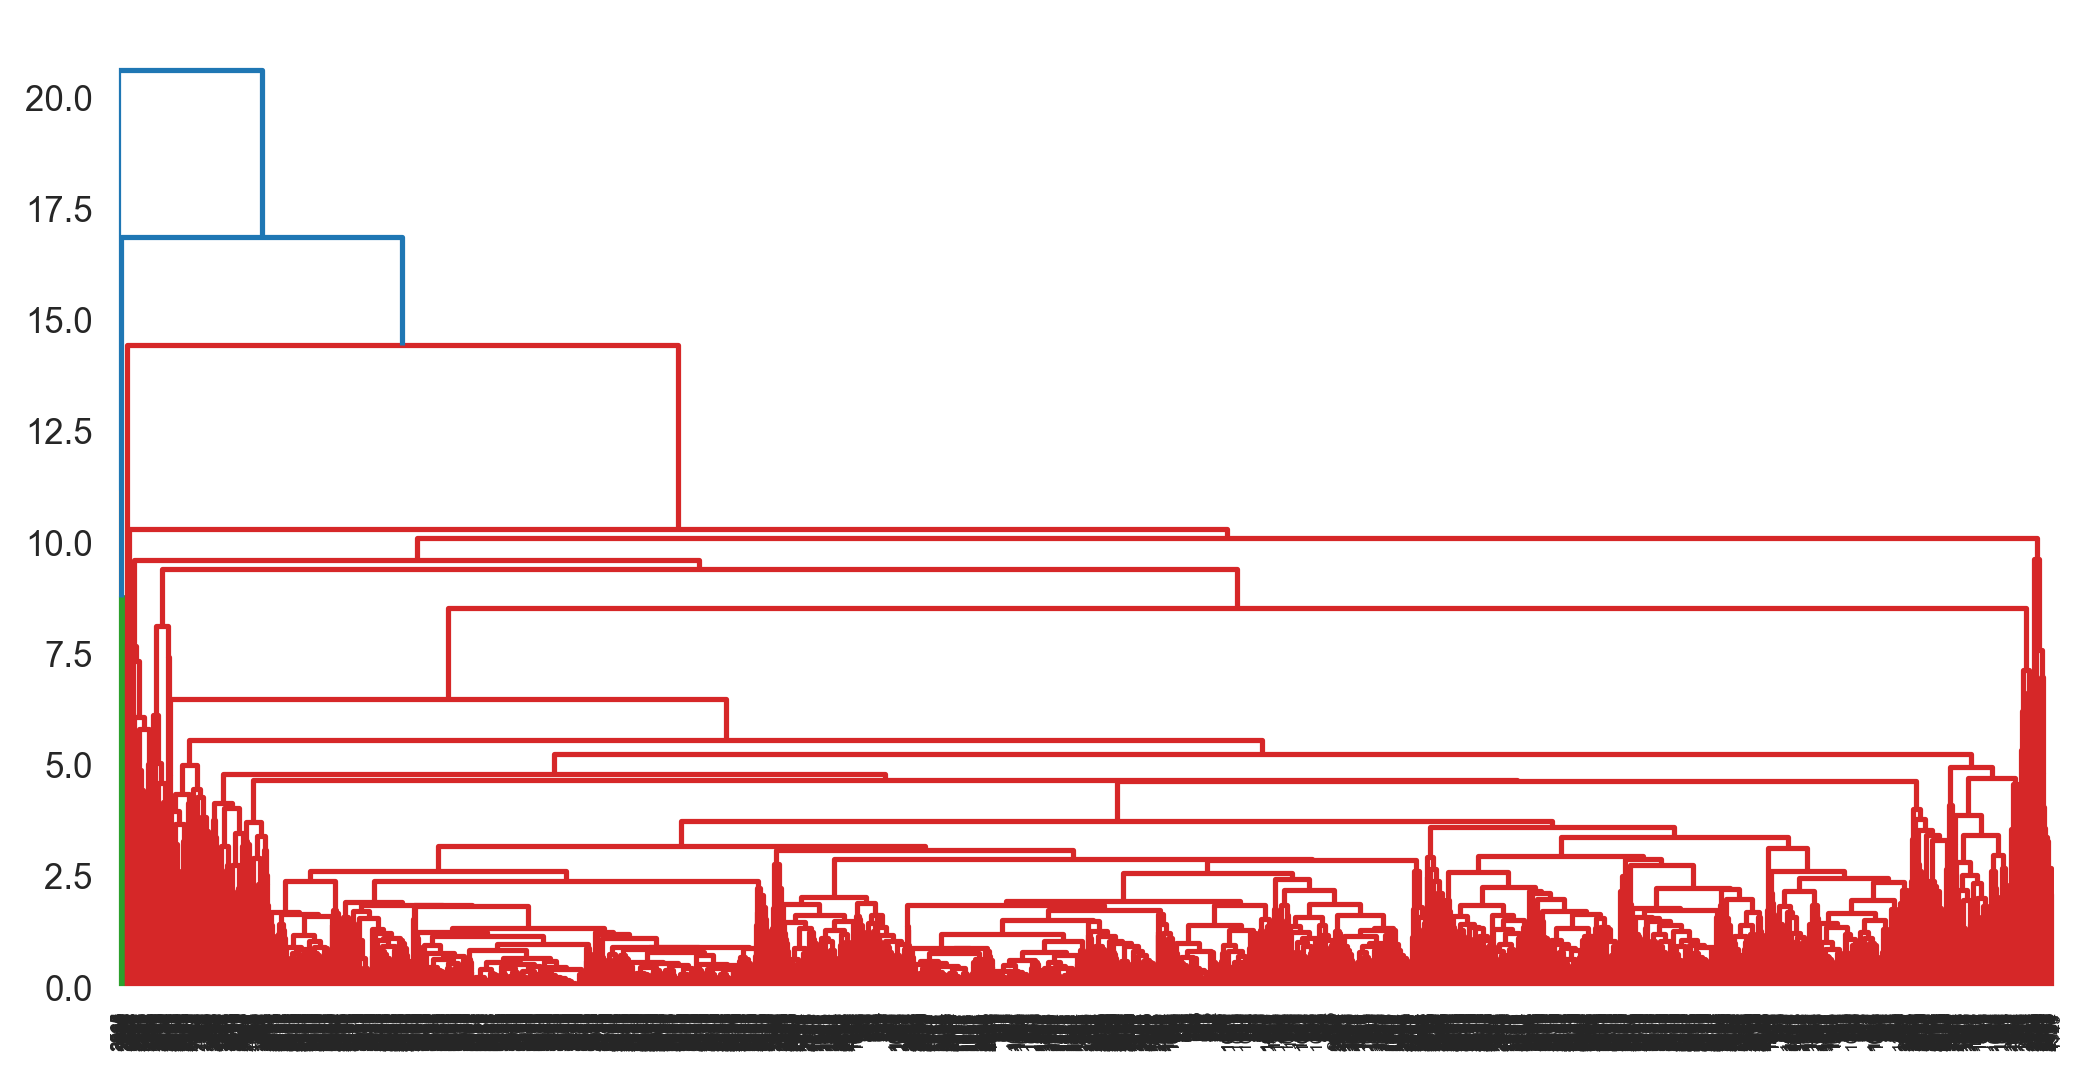

In [8]:
lk = hierarchy.linkage(x,method='average')
dendogram = hierarchy.dendrogram(lk)

In [9]:
hc = AgglomerativeClustering(n_clusters=5)

In [10]:
y = hc.fit_predict(x)

In [11]:
df['Cluster'] = y
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


In [12]:
df.groupby('Cluster').mean()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Cluster,,,,,,,,,,,,
0,1695.324337,101276.799518,251.093494,2.813012,1.000000,1.000000,27421.138313,15.320482,524.836627,1.575422,4703.515663,0.674699
1,2388.934444,38220.721111,9.431667,1.183889,1.000000,1.000000,3770.797222,6.238333,113.728333,0.383889,3429.802778,0.000000
2,1752.952381,160067.206349,573.587302,2.507937,1.000000,1.000000,42723.841270,34.142857,8148.619048,22.444444,4527.253968,0.873016
3,2269.372093,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349
4,1742.444444,129951.388889,65.666667,3.388889,1.000000,3.722222,86259.888889,26.222222,422.222222,1.333333,4488.777778,0.500000


In [13]:
hc_score = silhouette_score(x,y)

## K-Means Clustering Model

In [14]:
km = KMeans(n_clusters=14)
y = km.fit_predict(x)

In [15]:
km.cluster_centers_

array([[-7.39794277e-01, -2.80346965e-01, -1.47955993e-01,
        -7.09595972e-01, -9.82418871e-02, -5.61568747e-02,
        -5.96975579e-01, -6.29193605e-01, -2.18067701e-01,
        -2.36629528e-01,  7.11802360e-01, -7.66919299e-01],
       [ 7.01418234e-01,  8.07704999e-02, -1.46379305e-01,
         6.11645257e-01, -9.82418871e-02, -4.91428525e-02,
         2.20242032e-01,  6.69888118e-01, -2.36168199e-01,
        -2.63994903e-01, -6.92705869e-01, -7.66919299e-01],
       [-3.01522483e-01,  6.39719256e-01, -8.44329231e-02,
         1.02208440e+00, -9.82418871e-02,  1.56462993e+01,
         3.17969131e+00,  1.71461374e+00,  3.32926913e-02,
         5.96953922e-02,  2.39872612e-01,  3.37527346e-01],
       [-1.02868120e+00,  5.33902531e+00,  1.14653910e-01,
         1.37124202e+00, -9.82418871e-02, -6.27665798e-02,
         2.40367579e+00,  1.14678563e+00,  7.29992518e-01,
         9.83908986e-01,  1.14819429e+00,  9.76943824e-01],
       [-1.68647462e-01,  5.28007990e-01,  2.0190985

In [16]:
silhouette_score(x,y)

0.28496313690640906

In [17]:
wcss = []

for i in range(1,20):
    km = KMeans(n_clusters=i)
    km.fit_predict(x)
    wcss.append(km.inertia_)

In [18]:
wcss

[47988.0,
 39018.84909768941,
 34529.31310921639,
 30616.647338328996,
 26894.75305989323,
 25098.367167493845,
 20922.822695900202,
 19329.217300100423,
 18014.37797731637,
 16769.271921286494,
 15842.874748203623,
 14923.899797943304,
 14235.101239742839,
 13581.518357749937,
 13116.330283182082,
 12671.132339338299,
 12204.357280403023,
 11655.287361398608,
 11392.428607396794]

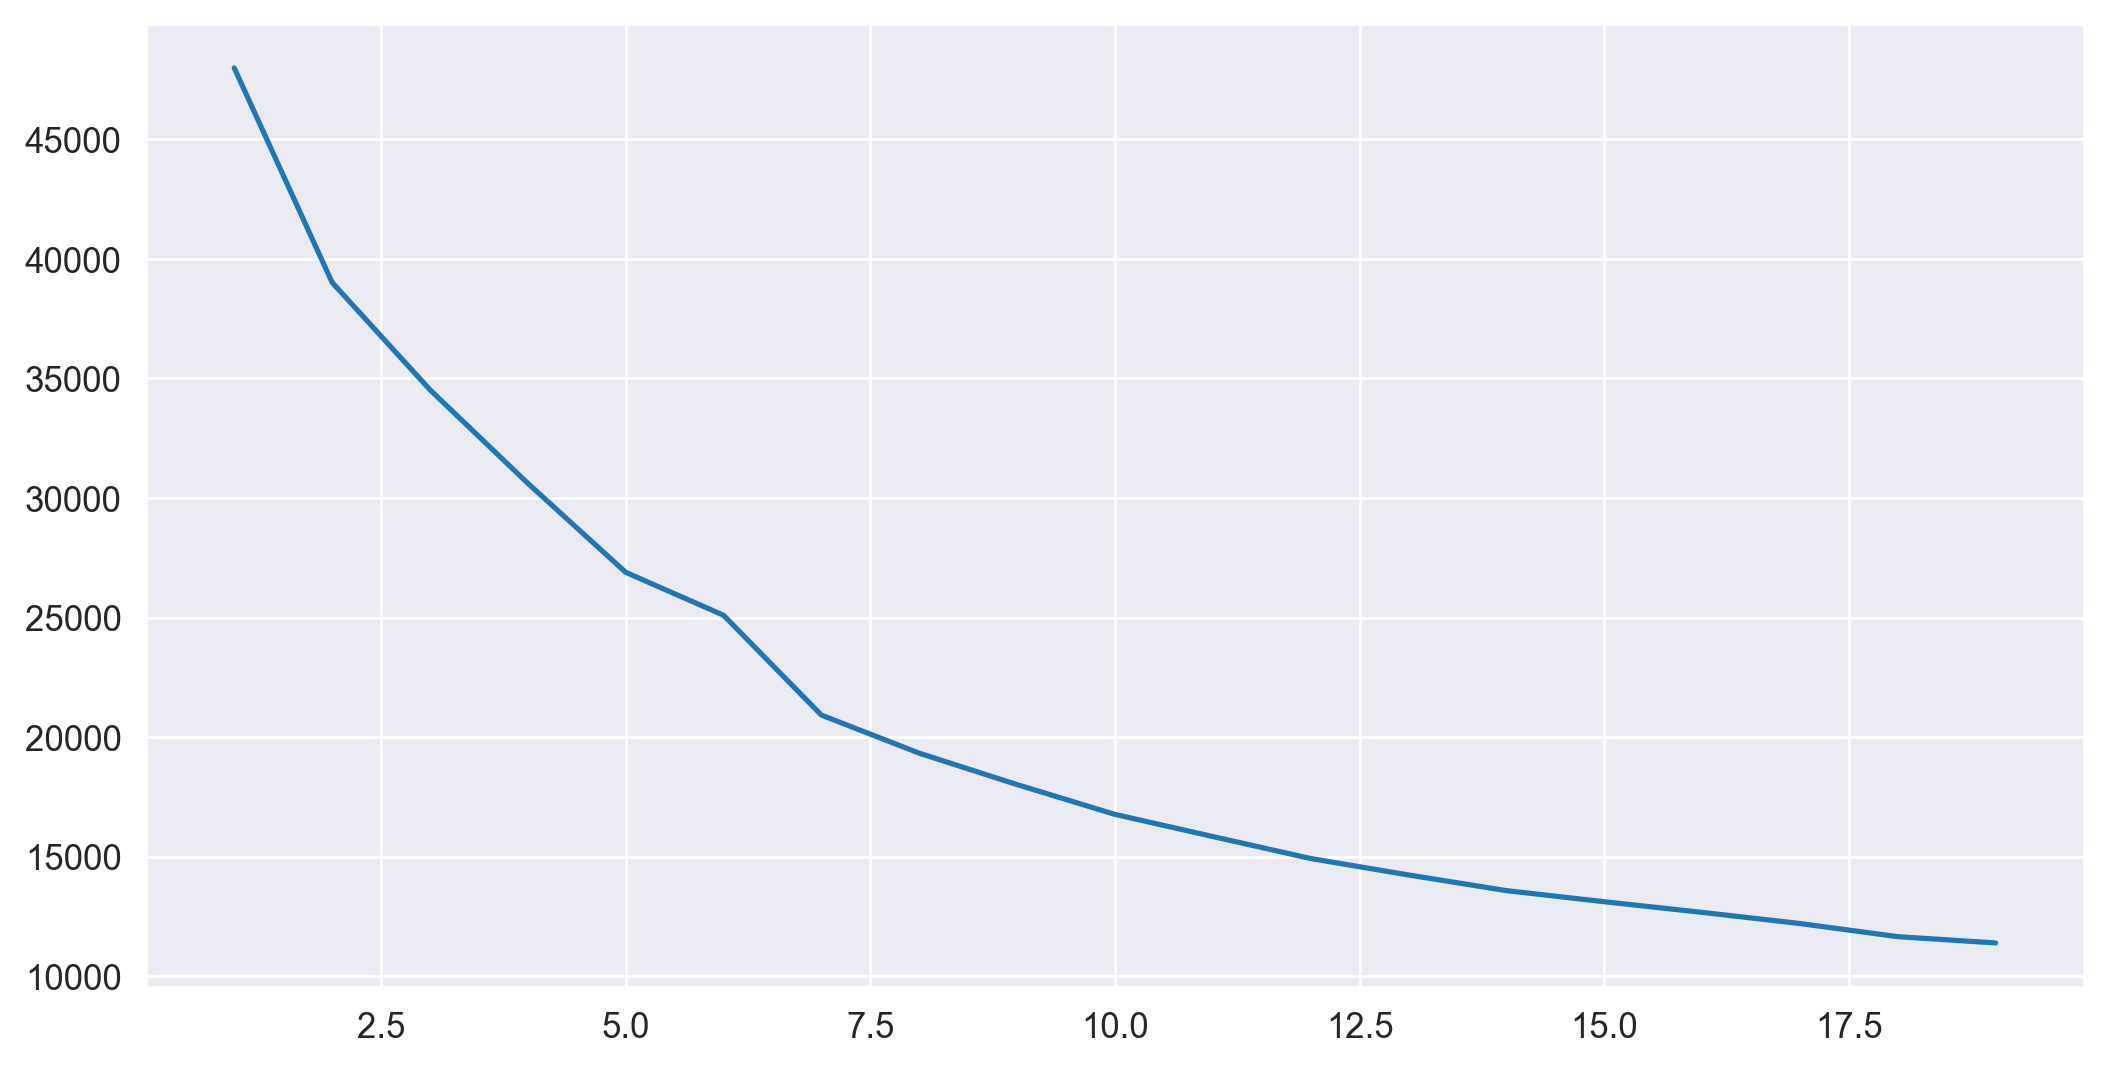

In [19]:
plt.plot(range(1,20),wcss)

In [20]:
km = KMeans(n_clusters=2)
ypred = km.fit_predict(x)
ypred

array([0, 0, 0, ..., 0, 0, 0])

In [21]:
km.cluster_centers_

array([[ 0.25790113, -0.29739046, -0.07784241, -0.53090509,  0.01583461,
        -0.05509813, -0.47832432, -0.43351794, -0.17989992, -0.1966868 ,
        -0.26189363, -0.33368646],
       [-0.51930054,  0.59881485,  0.15674071,  1.0690116 , -0.031884  ,
         0.11094364,  0.96313685,  0.8729163 ,  0.36224008,  0.39604153,
         0.5273397 ,  0.67189919]])

In [22]:
km_score = silhouette_score(x,ypred)
km_score

0.29764766197813075

In [23]:
df['Cluster'] = ypred
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [24]:
df.groupby('Cluster').agg('mean')

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Cluster,,,,,,,,,,,,
0,2314.228123,43670.066567,83.835453,1.329469,1.016829,1.001496,5599.389304,7.447644,208.034031,0.62715,3577.637996,0.209798
1,1410.578868,134006.000755,265.764528,3.532830,1.009811,1.033962,40444.885283,19.985660,968.664151,2.88000,5210.200000,0.694340


## DBSCAN Clustering Model

In [25]:
db = DBSCAN(eps=8,min_samples=4)
ypred = db.fit_predict(x)
ypred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [26]:
db_score = silhouette_score(x,ypred)

In [27]:
df['Cluster'] = ypred
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [28]:
df.groupby('Cluster').agg('mean')

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Cluster,,,,,,,,,,,,
-1,3606.000000,160114.000000,500.000000,1.00000,1.000000,1.000000,71954.000000,86.000000,30817.000000,53.00000,1373.000000,1.000000
0,2014.421461,73579.688594,144.025513,2.05978,1.014507,1.012256,17131.137069,11.583292,452.462731,1.36068,4119.246123,0.370185


In [29]:
scores = pd.DataFrame([hc_score,km_score,db_score],['Hierarchy Clustering',"KMeans Clustering","DBSCAN Clustering"])
scores

,0
Hierarchy Clustering,0.218189
KMeans Clustering,0.297648
DBSCAN Clustering,0.846729
